# Exercices

With each exercice will teach you one aspect of deep learning.
The process of machine learning can be decompose in 7 steps :

0. Data acquisition
1. Data preparation
2. Model definition
3. Model training
4. Model evaluation
5. Hyperparameter tuning
6. Prediction

In [1]:
from __future__ import print_function
import torch

## 2 - Model definition

from https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html


### Tensors

#### Initialization of tensors

In [2]:
x = torch.empty(5, 3)
print(x)

tensor([[0.0000e+00, 4.6566e-10, 0.0000e+00],
        [4.6566e-10, 3.1171e-19, 1.4013e-45],
        [6.4696e-32, 1.4013e-45, 3.3538e-19],
        [1.4013e-45, 3.1312e-19, 1.4013e-45],
        [7.0589e-32, 1.4013e-45, 7.0955e-32]])


In [3]:
x = torch.rand(5, 3)
print(x)

tensor([[0.4062, 0.7072, 0.9770],
        [0.1909, 0.7009, 0.1559],
        [0.8525, 0.7729, 0.3017],
        [0.1037, 0.5744, 0.3012],
        [0.0555, 0.4901, 0.0966]])


In [4]:
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


In [5]:
x = torch.tensor([5.5, 3])
print(x)

tensor([5.5000, 3.0000])


In [6]:
x = x.new_ones(5, 3, dtype=torch.double)      # new_* methods take in sizes
print(x)

x = torch.randn_like(x, dtype=torch.float)    # override dtype!
print(x)                                      # result has the same size

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[ 0.3147,  0.1742,  1.8138],
        [-1.6407, -0.9755,  0.1839],
        [-0.2354, -0.6075,  1.1882],
        [ 0.0204,  1.2262,  0.1433],
        [-0.2412,  1.6028, -0.7083]])


In [7]:
print(x.size())

torch.Size([5, 3])


#### Tensors operations

In [8]:
y = torch.randn_like(x, dtype=torch.float) 
print(torch.add(x, y))

tensor([[ 2.2026, -0.1971,  2.1713],
        [-1.0568, -2.5296,  0.5134],
        [ 0.1837, -1.6991,  1.9190],
        [ 1.2808,  1.8063, -1.2301],
        [-0.4623, -0.0785, -2.1711]])


In [9]:
result = torch.empty(5, 3)
torch.sub(x, y, out=result)
print(result)

tensor([[-1.5732,  0.5455,  1.4563],
        [-2.2246,  0.5786, -0.1456],
        [-0.6545,  0.4841,  0.4574],
        [-1.2400,  0.6461,  1.5168],
        [-0.0201,  3.2841,  0.7545]])


In [10]:
print(x[:, 1])

tensor([ 0.1742, -0.9755, -0.6075,  1.2262,  1.6028])


In [11]:
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)  # the size -1 is inferred from other dimensions
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


In [12]:
x = torch.randn(1)
print(x)
print(x.item()) # get value as number

tensor([-0.1921])
-0.19212159514427185


#### Tensors bridge to numpy

In [13]:
a = torch.ones(5)
print(a)
b = a.numpy() # numpy view to a (reference)
print(b)

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]


In [14]:
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


In [15]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a) # data copied (value transfer)
np.add(a, 1, out=a)
print(a)
print(b)
a = a + 1
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
[3. 3. 3. 3. 3.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


#### Load in GPU

In [16]:
if torch.cuda.is_available():
    device = torch.device("cuda")          # a CUDA device object
    y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
    x = x.to(device)                       # or just use strings ``.to("cuda")``
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))       # ``.to`` can also change dtype together!
    

### Autograd of tensors

In [17]:
x = torch.ones(2, 2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [18]:
y = x + 2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [19]:
print(y.grad_fn)

In [20]:
z = y * y * 3
out = z.mean()

print(z, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward1>)


In [21]:
a = torch.randn(2, 2)
a = ((a * 3) / (a - 1))
print(a.requires_grad)
a.requires_grad_(True)
print(a.requires_grad)
b = (a * a).sum()
print(b.grad_fn)

False
True


In [22]:
out.backward()
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


In [23]:
out.backward()

RuntimeError: Trying to backward through the graph a second time, but the buffers have already been freed. Specify retain_graph=True when calling backward the first time.

In [24]:
x = torch.randn(3, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2

print(y)

tensor([ -230.8003, -1164.6212,  -873.3654], grad_fn=<MulBackward0>)


In [25]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(v)

print(x.grad)

tensor([1.0240e+02, 1.0240e+03, 1.0240e-01])


In [26]:
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
    print((x ** 2).requires_grad)

True
True
False


# Building neural network from scratch

### LeNet architecture
http://yann.lecun.com/exdb/lenet/

In [27]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


leNet = Net()
print(leNet)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [28]:
params = list(leNet.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight

10
torch.Size([6, 1, 5, 5])


In [29]:
print(params)

[Parameter containing:
tensor([[[[ 0.1763,  0.0460,  0.1209, -0.0257,  0.0316],
          [-0.1940,  0.1064, -0.0153,  0.1299,  0.0409],
          [ 0.1553, -0.1324,  0.1169, -0.1922,  0.1452],
          [-0.1226,  0.1587, -0.0170, -0.0528,  0.1598],
          [ 0.0723,  0.0136, -0.1449, -0.0979,  0.0180]]],


        [[[ 0.0098,  0.0649,  0.1186, -0.1589, -0.0252],
          [ 0.0317,  0.1170,  0.1211, -0.1991,  0.0302],
          [-0.0633,  0.1773,  0.1296,  0.0117, -0.0780],
          [-0.1113,  0.1299, -0.1637,  0.0768, -0.1676],
          [-0.1112, -0.1382, -0.1945,  0.1687, -0.1224]]],


        [[[ 0.0353,  0.1181,  0.0706,  0.0740, -0.1646],
          [ 0.0570, -0.1923,  0.1263, -0.1967, -0.1574],
          [-0.1651,  0.1093, -0.0727, -0.1736, -0.0095],
          [-0.1713, -0.0646, -0.1810,  0.1403,  0.1088],
          [-0.0733,  0.0346, -0.0662, -0.0883,  0.0852]]],


        [[[ 0.1542,  0.0151, -0.0899, -0.0306, -0.0728],
          [ 0.0978,  0.1640, -0.0420, -0.1495,  0.059

In [30]:
input = torch.randn(1, 1, 32, 32)
out = leNet(input)
print(out)

tensor([[ 0.0217, -0.0229,  0.0645, -0.1187,  0.1667,  0.0362, -0.0968,  0.0205,
          0.0042, -0.1033]], grad_fn=<AddmmBackward>)


### Save and load the model

In [31]:
torch.save(leNet.state_dict(), './leNet.h5')

In [32]:
anotherNet = Net()
anotherNet.load_state_dict(torch.load('./leNet.h5'))
anotherNet.eval()

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

### Loss Function

In [55]:
input = torch.randn(1, 1, 32, 32) # random input
output = leNet(input)
target = torch.randn(10)  # a dummy target, for example
target = target.view(1, -1)  # make it the same shape as output

criterion = nn.MSELoss()
#criterion = nn.CrossEntropyLoss()

loss = criterion(output, target)
print(loss)

tensor(20.3533, grad_fn=<MseLossBackward>)


In [56]:
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

## Backprop

In [57]:
leNet.zero_grad()     # zeroes the gradient buffers of all parameters

print('conv1.bias.grad before backward')
print(leNet.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(leNet.conv1.bias.grad)

conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backward
tensor([-0.0111, -0.0038, -0.0115, -0.0072, -0.0006,  0.0181])


In [58]:
import torch.optim as optim

# create your optimizer
# optimizer = optim.SGD(leNet.parameters(), lr=0.01)
optimizer = optim.Adam(leNet.parameters(), lr=2e-3)

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
output = leNet(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()    # Does the update

### Saving/loading during training

In [59]:
import time
import datetime
stamp = datetime.datetime.fromtimestamp(time.time()).strftime('%Y-%m-%dT%H.%M.%S')
torch.save({
            'epoch': 1,
            'model_state_dict': leNet.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': loss,
            }, 'checkpoint-{}.last'.format(stamp))

In [60]:
model = Net()
optimizer = optim.SGD(leNet.parameters(), lr=0.01)

checkpoint = torch.load('checkpoint-{}.last'.format(stamp))
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
loss = checkpoint['loss']

## Loading data

### Preparing dataset

Remember lesson 1?

#### Loading MNIST data

In [61]:
import torchvision.datasets as dset
import torchvision.transforms as transforms

data_path = './data'

#trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (1.0,))])
trans = transforms.Compose([transforms.Resize((32, 32)), transforms.ToTensor()])

# if not exist, download mnist dataset
train_set = dset.MNIST(root=data_path, train=True, transform=trans, download=True)
test_set = dset.MNIST(root=data_path, train=False, transform=trans, download=True)

In [62]:
print(len(train_set))
print(len(test_set))

60000
10000


<class 'torch.Tensor'> torch.Size([1, 32, 32])
1
<class 'torch.Tensor'> torch.Size([32, 1, 32])


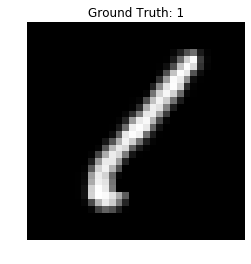

In [63]:
import matplotlib.pyplot as plt
import random

fig = plt.figure()

sample = train_set[random.randint(1,len(train_set))]
print(type(sample[0]), sample[0].shape)
print(sample[1].item())

tensor_image = sample[0].view(sample[0].shape[2], sample[0].shape[0], sample[0].shape[1])
print(type(tensor_image), tensor_image.shape)

tensor_image = torch.squeeze(tensor_image)

plt.imshow(tensor_image, cmap='gray', interpolation='none')
plt.title("Ground Truth: {}".format(sample[1].item()))

plt.axis('off')
plt.ioff()
plt.show()

## backups

In [ ]:
def valid_imshow_data(data):
    data = np.asarray(data)
    if data.ndim == 2:
        return True
    elif data.ndim == 3:
        if 3 <= data.shape[2] <= 4:
            return True
        else:
            print('The "data" has 3 dimensions but the last dimension '
                  'must have a length of 3 (RGB) or 4 (RGBA), not "{}".'
                  ''.format(data.shape[2]))
            return False
    else:
        print('To visualize an image the data must be 2 dimensional or '
              '3 dimensional, not "{}".'
              ''.format(data.ndim))
        return False

In [ ]:
from scipy.misc import face
import matplotlib.pyplot as plt
import torch

np_image = face()
print(type(np_image), np_image.shape)
tensor_image = torch.from_numpy(np_image)
print(type(tensor_image), tensor_image.shape)
# reshape to channel first:
tensor_image = tensor_image.view(tensor_image.shape[2], tensor_image.shape[0], tensor_image.shape[1])
print(type(tensor_image), tensor_image.shape)

# If you try to plot image with shape (C, H, W)
# You will get TypeError:
# plt.imshow(tensor_image)

# So we need to reshape it to (H, W, C):
tensor_image = tensor_image.view(tensor_image.shape[1], tensor_image.shape[2], tensor_image.shape[0])
print(type(tensor_image), tensor_image.shape)

plt.imshow(tensor_image)
plt.show()